## Proyecto final procesamiento de lenguaje natural

**Integrantes:**

* Laura del Pilar Torres Toro - Código: 617202012
* Gabriel Cruz Parra - Código: 617202013

**Planteamiento del Problema:**

* Determinar la variación de opinión de x personajes políticos en los últimos 10 años respecto a un tema determinado.

**Motivación:**

* Determinar si en la clase política colombiana existe una tendencia a contradecir sus convicciones.

**Metodología:**

* Adquisición de los datos 
* Pre procesamiento
* Clasificación
* Determinación de variación

### Desarrollo del proyecto

* Obtenemos por entrada de teclado un conjunto de parámetros deseados por el usuario:

In [131]:
import snscrape.modules.twitter as sntwitter
from datetime import datetime
from datetime import timedelta
import pandas as pd
import re
import six
import ipywidgets as widgets
from google.cloud import translate_v2 as translate
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence

import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

vader = SentimentIntensityAnalyzer()

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
! pip install plotly
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot


C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [132]:
listadoPoliticos = pd.read_excel('listadoPoliticos.xlsx')


listadoTemas = pd.read_excel('listadoPoliticos.xlsx', sheet_name='Temas')
listadoTemas

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Tema
0,Aborto
1,La inmigración ilegal
2,La violencia de pareja y de género
3,Legalizacion de drogas
4,Subsidios
5,Pena de muerte
6,Legalización de armas
7,Extincion de dominio
8,Reforma tributaria
9,Reforma a la Salud


In [133]:
opcionesPoliticos= []
for index, row in listadoPoliticos.iterrows():
    opcionesPoliticos.append((row["Politico"]+" - "+row["Cargo"], row["Cuenta"]))

opcionesTemas = []
for index, row in listadoTemas.iterrows():
    opcionesTemas.append(row["Tema"])

opcionesTemas

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['Aborto',
 'La inmigración ilegal',
 'La violencia de pareja y de género',
 'Legalizacion de drogas',
 'Subsidios',
 'Pena de muerte',
 'Legalización de armas',
 'Extincion de dominio',
 'Reforma tributaria',
 'Reforma a la Salud',
 'Reforma Pensional',
 'Educación gratuita',
 'Matrimonio igualitario',
 'Infraestructura']

In [134]:
    
dropdown_politicos = widgets.Dropdown(options =opcionesPoliticos, description="Político: ", )
dropdown_temas = widgets.Dropdown(options =opcionesTemas, description="Temas: ")
#display(dropdown_politicos)
#display(dropdown_temas)
slider_vigencias = widgets.IntSlider(description="Años: ", min=1, max=10, step=1)
text_vigencias = widgets.IntText(description="Años: ")
#display(slider_vigencias, text_vigencias)
widgets.jslink((slider_vigencias, 'value'), (text_vigencias, 'value'))

input_widgets = widgets.HBox(
[dropdown_politicos, dropdown_temas, slider_vigencias])
display(input_widgets)

#vigencias = int(input('Digite el número de años para retro búsqueda: '))
#tema = input('Digite el tema deseado: ')

   

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [135]:
politico = dropdown_politicos.value
tema = dropdown_temas.value
now = datetime.now()
retro_search = now - timedelta(days = (365*text_vigencias.value))
hoy = now.strftime("%Y-%m-%d")
pasado = retro_search.strftime("%Y-%m-%d")
print('desde: ', pasado, 'hasta', hoy)
tweet_list = []
maxTweets = 300  
# petrogustavo
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{tema} since:{pasado} until:{hoy} from:{politico}').get_items()) :
    if i > maxTweets :
        break
    print(tweet)
    print(tweet.date)
    print(tweet.content)
    print(type(tweet))
    print("*"*100)
    print()
        
    tweet_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.displayname, tweet])
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(tweet_list, columns=['Fecha', 'tweet_id', 'contenido', 'usuario', 'usuario_mostrar', 'enlace'])
tweets_df.head() 

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



desde:  2020-06-02 hasta 2021-06-02
https://twitter.com/AlvaroUribeVel/status/1396969678170435586
2021-05-24 23:21:40+00:00
Cierto: 
Al Pte Duque le montaron saboteo y violencia desde su elección;

Pero: 
Aumento d pobreza por pandemia y reforma tributaria generaron gran inconformidad social;

Necesidad:
Políticas sociales y recursos pagados por ls más pudientes;
Autoridad frente violencia y bloqueos
<class 'snscrape.modules.twitter.Tweet'>
****************************************************************************************************

https://twitter.com/AlvaroUribeVel/status/1396154864393232396
2021-05-22 17:23:53+00:00
La reforma tributaria retirada fracasó primero en la opinión pública, después en el Congreso.

La nueva, que pagarían los más pudientes para financiar la política social necesita que el Gbno la legitime primero ante la opinión pública.
<class 'snscrape.modules.twitter.Tweet'>
****************************************************************************************

,Fecha,tweet_id,contenido,usuario,usuario_mostrar,enlace
0,2021-05-24 23:21:40+00:00,1396969678170435586,Cierto: \nAl Pte Duque le montaron saboteo y v...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...
1,2021-05-22 17:23:53+00:00,1396154864393232396,La reforma tributaria retirada fracasó primero...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...
2,2021-05-22 15:47:59+00:00,1396130727738159105,Si la reforma tributaria la pagarían solamente...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...
3,2021-05-13 12:58:06+00:00,1392826487145914373,"La violencia que ha aparecido en estos días, n...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1392...
4,2021-05-01 12:34:33+00:00,1388471905708089345,"Grupos violentos organizados, \n\ncon terroris...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1388...


In [136]:
# Definición de función de pre-procesamiento
stopwords_sp = stopwords.words('spanish')

def preProcesado(texto):
    pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
    pattern2 = '?P<url>https?://[^\s]+'
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",texto)]
    for link in links:
        texto = texto.replace(link,"")
    
    hashtags = [interaction for interaction in texto.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        texto = texto.replace(hashtag, "")
        
    mentions = [interaction for interaction in texto.split() if interaction.startswith("@")]
    for mention in mentions:
        texto = texto.replace(mention, "")
    
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = [palabra for palabra in texto if len(palabra)>=2]
    texto = " ".join(texto)
    return texto

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:5: DeprecationWarning:

invalid escape sequence \s

<>:6: DeprecationWarning:

invalid escape sequence \s

<>:5: DeprecationWarning:

invalid escape sequence \s

<>:6: DeprecationWarning:

invalid escape sequence \s

<ipython-input-136-7bff978cb1ed>:5: DeprecationWarning:

invalid escape sequence \s

<ipython-input-136-7bff978cb1ed>:6: DeprecationWarning:

invalid escape sequence \s



In [137]:
tweets_df['pre_procesado'] = tweets_df['contenido'].apply(lambda x: preProcesado(x))
tweets_df.head()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Fecha,tweet_id,contenido,usuario,usuario_mostrar,enlace,pre_procesado
0,2021-05-24 23:21:40+00:00,1396969678170435586,Cierto: \nAl Pte Duque le montaron saboteo y v...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,cierto pte duque montaron saboteo violencia el...
1,2021-05-22 17:23:53+00:00,1396154864393232396,La reforma tributaria retirada fracasó primero...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,reforma tributaria retirada fracasó primero op...
2,2021-05-22 15:47:59+00:00,1396130727738159105,Si la reforma tributaria la pagarían solamente...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,si reforma tributaria pagarían solamente pudie...
3,2021-05-13 12:58:06+00:00,1392826487145914373,"La violencia que ha aparecido en estos días, n...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1392...,violencia aparecido días sido espontánea preme...
4,2021-05-01 12:34:33+00:00,1388471905708089345,"Grupos violentos organizados, \n\ncon terroris...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1388...,grupos violentos organizados terrorismo premed...


In [138]:
translate_client = translate.Client()

def traducir(texto, lenguaje):
    if isinstance(texto, six.binary_type):
        texto = texto.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    resultado = translate_client.translate(texto, target_language=lenguaje)
    return resultado['translatedText']

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [139]:
lenguaje = 'en'
tweets_df['traducido'] = tweets_df['pre_procesado'].apply(lambda x: traducir(x,lenguaje))
tweets_df.head()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Fecha,tweet_id,contenido,usuario,usuario_mostrar,enlace,pre_procesado,traducido
0,2021-05-24 23:21:40+00:00,1396969678170435586,Cierto: \nAl Pte Duque le montaron saboteo y v...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,cierto pte duque montaron saboteo violencia el...,certain pte duke mounted sabotage violence ele...
1,2021-05-22 17:23:53+00:00,1396154864393232396,La reforma tributaria retirada fracasó primero...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,reforma tributaria retirada fracasó primero op...,tax reform withdrawn failed first public opini...
2,2021-05-22 15:47:59+00:00,1396130727738159105,Si la reforma tributaria la pagarían solamente...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,si reforma tributaria pagarían solamente pudie...,if tax reform would pay only the wealthy expan...
3,2021-05-13 12:58:06+00:00,1392826487145914373,"La violencia que ha aparecido en estos días, n...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1392...,violencia aparecido días sido espontánea preme...,violence appeared days been spontaneous premed...
4,2021-05-01 12:34:33+00:00,1388471905708089345,"Grupos violentos organizados, \n\ncon terroris...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1388...,grupos violentos organizados terrorismo premed...,organized violent groups premeditated terroris...


In [140]:

tfidf_vect = TfidfVectorizer(preprocessor=preProcesado)
tfidf = tfidf_vect.fit_transform(tweets_df.contenido.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())
tfidf_matrix

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,acelerar,aceptado,acuerdo,adicionales,administrativa,agudización,agudizada,ahorro,aire,alternativo,...,va,vacilación,vacunación,vamos,viable,violencia,violentos,virtual,vivido,álvaro
0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.344781,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.238682,0.000000,0.00000,0.238682,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.191208,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.252166,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252166,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.219389,0.000000,0.000000,0.248276,...,0.000000,0.248276,0.000000,0.000000,0.000000,0.198894,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.176692,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.275858,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.282627,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389909
9,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [141]:
# Método del codo para determinar  𝐾
ks = []
k_inertias = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



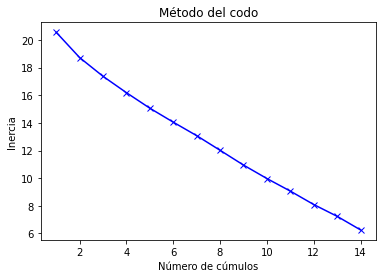

In [142]:
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

In [143]:
#Entrenar modelo con el  𝐾  escogido
k = 11
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(n_clusters=11)

In [144]:
tweets_df['cluster'] = model.labels_
tweets_df

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Fecha,tweet_id,contenido,usuario,usuario_mostrar,enlace,pre_procesado,traducido,cluster
0,2021-05-24 23:21:40+00:00,1396969678170435586,Cierto: \nAl Pte Duque le montaron saboteo y v...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,cierto pte duque montaron saboteo violencia el...,certain pte duke mounted sabotage violence ele...,5
1,2021-05-22 17:23:53+00:00,1396154864393232396,La reforma tributaria retirada fracasó primero...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,reforma tributaria retirada fracasó primero op...,tax reform withdrawn failed first public opini...,6
2,2021-05-22 15:47:59+00:00,1396130727738159105,Si la reforma tributaria la pagarían solamente...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,si reforma tributaria pagarían solamente pudie...,if tax reform would pay only the wealthy expan...,6
3,2021-05-13 12:58:06+00:00,1392826487145914373,"La violencia que ha aparecido en estos días, n...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1392...,violencia aparecido días sido espontánea preme...,violence appeared days been spontaneous premed...,5
4,2021-05-01 12:34:33+00:00,1388471905708089345,"Grupos violentos organizados, \n\ncon terroris...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1388...,grupos violentos organizados terrorismo premed...,organized violent groups premeditated terroris...,8
5,2021-04-29 01:37:25+00:00,1387581757256519689,"La violencia estaba preparada, la sustentan en...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1387...,violencia preparada sustentan reforma tributar...,prepared violence support tax reform know how ...,5
6,2021-04-27 11:22:16+00:00,1387004164883030016,Uribe explica detalles de su propuesta de refo...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1387...,uribe explica detalles propuesta reforma tribu...,uribe explains details of the proposed tax ref...,2
7,2021-04-15 23:16:15+00:00,1382835188485459983,Senadores y Representantes del Centro Democrát...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1382...,senadores representantes centro democrático re...,senators representatives democratic center wil...,4
8,2021-04-12 11:50:50+00:00,1381575535206207489,"Álvaro Uribe pide reforma tributaria ""moderada...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1381...,álvaro uribe pide reforma tributaria moderada ...,Álvaro Uribe asks for moderate tax reform savi...,2
9,2021-04-10 21:40:39+00:00,1380999189509836800,Anif lanza propuestas para patrimonio y divide...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1380...,anif lanza propuestas patrimonio dividendos re...,anif launches proposals for equity dividends t...,3


In [145]:
#Interpretación de los clusters
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)
clust_cnt = tweets_df['cluster'].value_counts()
clust_cnt_pct = tweets_df['cluster'].value_counts(normalize=True)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [146]:
centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [147]:
for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in tweets_df.iloc[nbrs.kneighbors([centroids[i]])[1][0]].contenido.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()


Cluster # 0
Tiene 2 registros (8.70% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
social hablamos aire reforma tributaria acelerar inmediatas finanzas dificultades destruye públicas crisis creen reactivación condiciones democracia administrativa amenazan agudizada pandemia 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Al aire en @rcnradio con @jciragorri hablamos de la reforma tributaria social: 

https://t.co/YMy6gsV4z4

 *** La democracia se destruye por pobreza agudizada por pandemia y dificultades q amenazan crisis d finanzas públicas;

Que haya reforma administrativa d ahorro;

Y;

Reforma tributaria social y moderada.

Que creen condiciones inmediatas para acelerar reactivación y política social

 *** La violencia estaba preparada, la sustentan en una reforma tributaria que saben que no tiene manera de que la aprueben y que se busca un consenso de texto alternativo social para financiar la lucha contra la pobreza agudizada por la pandemia.

Apoyo sin vacilación a las FFAA


**************

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [148]:
#Visualización usando PCA
clusters = {0: 'autoridad',
            1: 'reforma',
            2: 'ley',
            3: 'politica',
            4: 'pais',
            5: 'democracia',
            6: 'patria',
            7: 'constitucion',
            8: 'garantia',
            9: 'gobierno',
            10: 'elecciones'
              }

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [149]:
tweets_df['nombres_clusters'] = tweets_df['cluster'].apply(lambda val: clusters[val])
tweets_df

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Fecha,tweet_id,contenido,usuario,usuario_mostrar,enlace,pre_procesado,traducido,cluster,nombres_clusters
0,2021-05-24 23:21:40+00:00,1396969678170435586,Cierto: \nAl Pte Duque le montaron saboteo y v...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,cierto pte duque montaron saboteo violencia el...,certain pte duke mounted sabotage violence ele...,5,democracia
1,2021-05-22 17:23:53+00:00,1396154864393232396,La reforma tributaria retirada fracasó primero...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,reforma tributaria retirada fracasó primero op...,tax reform withdrawn failed first public opini...,6,patria
2,2021-05-22 15:47:59+00:00,1396130727738159105,Si la reforma tributaria la pagarían solamente...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,si reforma tributaria pagarían solamente pudie...,if tax reform would pay only the wealthy expan...,6,patria
3,2021-05-13 12:58:06+00:00,1392826487145914373,"La violencia que ha aparecido en estos días, n...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1392...,violencia aparecido días sido espontánea preme...,violence appeared days been spontaneous premed...,5,democracia
4,2021-05-01 12:34:33+00:00,1388471905708089345,"Grupos violentos organizados, \n\ncon terroris...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1388...,grupos violentos organizados terrorismo premed...,organized violent groups premeditated terroris...,8,garantia
5,2021-04-29 01:37:25+00:00,1387581757256519689,"La violencia estaba preparada, la sustentan en...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1387...,violencia preparada sustentan reforma tributar...,prepared violence support tax reform know how ...,5,democracia
6,2021-04-27 11:22:16+00:00,1387004164883030016,Uribe explica detalles de su propuesta de refo...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1387...,uribe explica detalles propuesta reforma tribu...,uribe explains details of the proposed tax ref...,2,ley
7,2021-04-15 23:16:15+00:00,1382835188485459983,Senadores y Representantes del Centro Democrát...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1382...,senadores representantes centro democrático re...,senators representatives democratic center wil...,4,pais
8,2021-04-12 11:50:50+00:00,1381575535206207489,"Álvaro Uribe pide reforma tributaria ""moderada...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1381...,álvaro uribe pide reforma tributaria moderada ...,Álvaro Uribe asks for moderate tax reform savi...,2,ley
9,2021-04-10 21:40:39+00:00,1380999189509836800,Anif lanza propuestas para patrimonio y divide...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1380...,anif lanza propuestas patrimonio dividendos re...,anif launches proposals for equity dividends t...,3,politica


In [150]:
df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()
df_centroids

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,cluster
0,0.11917,0.000000,0.000000,0.000000,0.11917,0.000000,1.053049e-01,7.633058e-02,0.314513,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,autoridad
1,0.00000,0.000000,0.000000,0.114588,0.00000,0.000000,0.000000e+00,8.331182e-02,0.000000,-1.734723e-18,...,-1.734723e-18,0.219154,0.000000,0.055597,0.000000,0.000000,0.000000,6.030498e-02,0.000000e+00,reforma
2,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,1.413135e-01,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.949547e-01,ley
3,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,3.469447e-18,6.938894e-18,0.000000,1.734723e-18,...,1.734723e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.734723e-18,9.617268e-02,politica
4,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,8.834588e-02,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.137929,0.000000e+00,0.000000e+00,pais
5,0.00000,0.000000,0.079561,0.000000,0.00000,0.079561,7.312969e-02,6.938894e-18,0.000000,8.275855e-02,...,8.275855e-02,0.000000,0.000000,0.000000,0.244961,0.000000,0.000000,1.734723e-18,3.469447e-18,democracia
6,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,patria
7,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,constitucion
8,0.00000,0.252166,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.252166,0.000000,0.000000e+00,0.000000e+00,garantia
9,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,gobierno


In [151]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = tweets_df.nombres_clusters.values
result['texto'] = tweets_df.contenido.apply(lambda val: val[:140])

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [152]:
colorsIdx = {'autoridad': "blue",
            "reforma": "yellow",
            'ley': "green",
            'politica': "red",
            'pais': "darkgray",
            'democracia':"darkred",
            'patria':"dodgerblue",
            'constitucion':"firebrick",
            'garantia': "dimgrey",
            'gobierno': "blueviolet",
            'elecciones':"beige"}
                

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [153]:
result['colores'] = result['cluster'].map(colorsIdx)
result.head()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,X,Y,cluster,texto,colores
0,-0.157427,0.000992,democracia,Cierto: \nAl Pte Duque le montaron saboteo y v...,darkred
1,-0.206211,0.002200,patria,La reforma tributaria retirada fracasó primero...,dodgerblue
2,-0.232723,-0.181749,patria,Si la reforma tributaria la pagarían solamente...,dodgerblue
3,-0.177919,0.164942,democracia,"La violencia que ha aparecido en estos días, n...",darkred
4,-0.172793,0.066917,garantia,"Grupos violentos organizados, \n\ncon terroris...",dimgrey


In [154]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [155]:
#Modelo de LDA
def pre_procesado2(textolda):
    textolda = textolda.lower()
    textolda = re.sub(r"[\W\d]+", " ", textolda)
    textolda = textolda.split() # tokenización 
    textolda = [palabra for palabra in textolda if palabra not in stopwords_sp]
    return textolda 

tweets_df['pre_procesado2'] = tweets_df['contenido'].apply(lambda val: pre_procesado2(val))
tweets_df.head()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Fecha,tweet_id,contenido,usuario,usuario_mostrar,enlace,pre_procesado,traducido,cluster,nombres_clusters,pre_procesado2
0,2021-05-24 23:21:40+00:00,1396969678170435586,Cierto: \nAl Pte Duque le montaron saboteo y v...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,cierto pte duque montaron saboteo violencia el...,certain pte duke mounted sabotage violence ele...,5,democracia,"[cierto, pte, duque, montaron, saboteo, violen..."
1,2021-05-22 17:23:53+00:00,1396154864393232396,La reforma tributaria retirada fracasó primero...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,reforma tributaria retirada fracasó primero op...,tax reform withdrawn failed first public opini...,6,patria,"[reforma, tributaria, retirada, fracasó, prime..."
2,2021-05-22 15:47:59+00:00,1396130727738159105,Si la reforma tributaria la pagarían solamente...,AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1396...,si reforma tributaria pagarían solamente pudie...,if tax reform would pay only the wealthy expan...,6,patria,"[si, reforma, tributaria, pagarían, solamente,..."
3,2021-05-13 12:58:06+00:00,1392826487145914373,"La violencia que ha aparecido en estos días, n...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1392...,violencia aparecido días sido espontánea preme...,violence appeared days been spontaneous premed...,5,democracia,"[violencia, aparecido, días, sido, espontánea,..."
4,2021-05-01 12:34:33+00:00,1388471905708089345,"Grupos violentos organizados, \n\ncon terroris...",AlvaroUribeVel,Álvaro Uribe Vélez,https://twitter.com/AlvaroUribeVel/status/1388...,grupos violentos organizados terrorismo premed...,organized violent groups premeditated terroris...,8,garantia,"[grupos, violentos, organizados, terrorismo, p..."


In [156]:
#Modelo de LDA
from gensim.corpora import Dictionary

# Crear una represantación de los documentos en forma de diccionario
dictionary = Dictionary(tweets_df['pre_procesado2'].values)

# Filtrar palabras muy frecuentes o infrecuentes
dictionary.filter_extremes(no_below=5, no_above=0.5) 

# Corpus
corpus = [dictionary.doc2bow(text) for text in tweets_df['pre_procesado2'].values]

# Entrenar el modelo
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 7, passes=10)


model.print_topics(num_words=10)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.365*"social" + 0.185*"pobreza" + 0.141*"ahorro" + 0.096*"moderada" + 0.096*"política" + 0.071*"pandemia" + 0.006*"entrevista" + 0.006*"reducción" + 0.006*"retos" + 0.006*"narcotráfico"'),
 (1,
  '0.077*"pobreza" + 0.077*"retos" + 0.077*"social" + 0.077*"entrevista" + 0.077*"reducción" + 0.077*"lafm" + 0.077*"pandemia" + 0.077*"moderada" + 0.077*"política" + 0.077*"seguridad"'),
 (2,
  '0.130*"ahorro" + 0.130*"política" + 0.114*"pobreza" + 0.113*"retos" + 0.113*"reducción" + 0.113*"entrevista" + 0.066*"vacunación" + 0.066*"seguridad" + 0.066*"lafm" + 0.066*"narcotráfico"'),
 (3,
  '0.296*"política" + 0.296*"entrevista" + 0.037*"social" + 0.037*"pandemia" + 0.037*"ahorro" + 0.037*"pobreza" + 0.037*"moderada" + 0.037*"reducción" + 0.037*"lafm" + 0.037*"vacunación"'),
 (4,
  '0.733*"pandemia" + 0.022*"pobreza" + 0.022*"social" + 0.022*"política" + 0.022*"entrevista" + 0.022*"ahorro" + 0.022*"moderada" + 0.022*"reducción" + 0.022*"narcotráfico" + 0.022*"retos"'),
 (5,
  '0.077*"so

In [157]:

model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5, passes=10)
model.print_topics(num_words=10)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.117*"moderada" + 0.114*"narcotráfico" + 0.114*"lafm" + 0.114*"vacunación" + 0.114*"seguridad" + 0.104*"pobreza" + 0.104*"reducción" + 0.104*"retos" + 0.098*"entrevista" + 0.005*"ahorro"'),
 (1,
  '0.077*"social" + 0.077*"pandemia" + 0.077*"pobreza" + 0.077*"política" + 0.077*"ahorro" + 0.077*"entrevista" + 0.077*"moderada" + 0.077*"reducción" + 0.077*"retos" + 0.077*"narcotráfico"'),
 (2,
  '0.267*"política" + 0.171*"ahorro" + 0.164*"entrevista" + 0.096*"pobreza" + 0.096*"retos" + 0.096*"reducción" + 0.019*"seguridad" + 0.019*"vacunación" + 0.019*"lafm" + 0.019*"narcotráfico"'),
 (3,
  '0.304*"social" + 0.231*"pandemia" + 0.157*"pobreza" + 0.119*"ahorro" + 0.082*"moderada" + 0.052*"política" + 0.008*"entrevista" + 0.008*"retos" + 0.008*"reducción" + 0.008*"lafm"'),
 (4,
  '0.077*"social" + 0.077*"pandemia" + 0.077*"política" + 0.077*"ahorro" + 0.077*"pobreza" + 0.077*"entrevista" + 0.077*"moderada" + 0.077*"retos" + 0.077*"reducción" + 0.077*"vacunación"')]

In [158]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(lda_display)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [161]:
# realización de análisis de sentimientos para cada tweet flair

classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

2021-06-02 17:18:47,038 loading file C:\Users\Usuario\.flair\models\sentiment-en-mix-distillbert_4.pt


C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



MemoryError: bad allocation

In [ ]:
tweets_df['textblob_sentiment_en'] = tweets_df['traducido'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_df['vader_sentiment_en'] = tweets_df['traducido'].apply(lambda x: vader.polarity_scores(x)['compound'])
tweets_df['flair_sentiment_en'] = tweets_df['traducido'].apply(lambda x: sent_flair(x))
tweets_df

In [ ]:
tweets_df['Año'] = tweets_df['Fecha'].dt.year
tweets_df.head()

In [ ]:
#Filtros flair en inglés
def get_positivos(frame, columna, agrupador):
    filtro = frame[frame[columna]>0.0]
    return filtro.groupby([agrupador]).count()

def get_negativos(frame, columna, agrupador):
    filtro = frame[frame[columna]<0.0]
    return filtro.groupby([agrupador]).count()

def get_neutros(frame, columna, agrupador):
    filtro = frame[frame[columna]==0.0]
    return filtro.groupby([agrupador]).count()


# conteos flair inglés
conteoPositivosFlairEn = get_positivos(tweets_df[['flair_sentiment_en','Año']],'flair_sentiment_en','Año')
conteoNegativosFlairEn = get_negativos(tweets_df[['flair_sentiment_en','Año']],'flair_sentiment_en', 'Año')
conteoNeutrosFlairEn = get_neutros(tweets_df[['flair_sentiment_en','Año']],'flair_sentiment_en','Año')

# conteos vader inglés
conteoPositivosVaderEn = get_positivos(tweets_df[['vader_sentiment_en','Año']],'vader_sentiment_en','Año')
conteoNegativosVaderEn = get_negativos(tweets_df[['vader_sentiment_en','Año']],'vader_sentiment_en','Año')
conteoNeutrosVaderEn = get_neutros(tweets_df[['vader_sentiment_en','Año']],'vader_sentiment_en','Año')
# conteos textblob inglés
conteoPositivosTextblobEn = get_positivos(tweets_df[['textblob_sentiment_en','Año']],'textblob_sentiment_en','Año')
conteoNegativosTextblobEn = get_negativos(tweets_df[['textblob_sentiment_en','Año']],'textblob_sentiment_en','Año')
conteoNeutrosTextblobEn = get_neutros(tweets_df[['textblob_sentiment_en','Año']],'textblob_sentiment_en','Año')


conteosData = pd.concat([conteoPositivosFlairEn, conteoNegativosFlairEn, conteoNeutrosFlairEn,
                        conteoPositivosVaderEn, conteoNegativosVaderEn, conteoNeutrosVaderEn,
                        conteoPositivosTextblobEn, conteoNegativosTextblobEn, conteoNeutrosTextblobEn], axis= 1)

listaValores = ['Año','+ flair (en)', '- flair (en)', '0 flair (en)',
               '+ vader (en)', '- vader (en)', '0 vader (en)',
               '+ textblob (en)', '- textblob (en)', '0 textblob (en)']
conteosData =pd.DataFrame(conteosData).reset_index()

conteosData.columns = listaValores
conteosData = conteosData.fillna(0)
conteosData

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



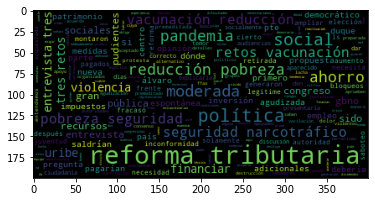

In [162]:
from wordcloud import WordCloud, ImageColorGenerator
palabras = tweets_df.pre_procesado.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



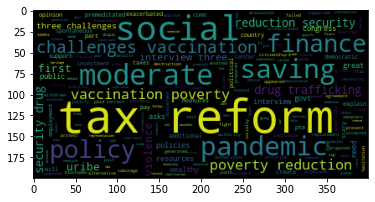

In [163]:
from wordcloud import WordCloud, ImageColorGenerator
palabrasen = tweets_df.traducido.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabrasen)

plt.imshow(wordcloud)
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



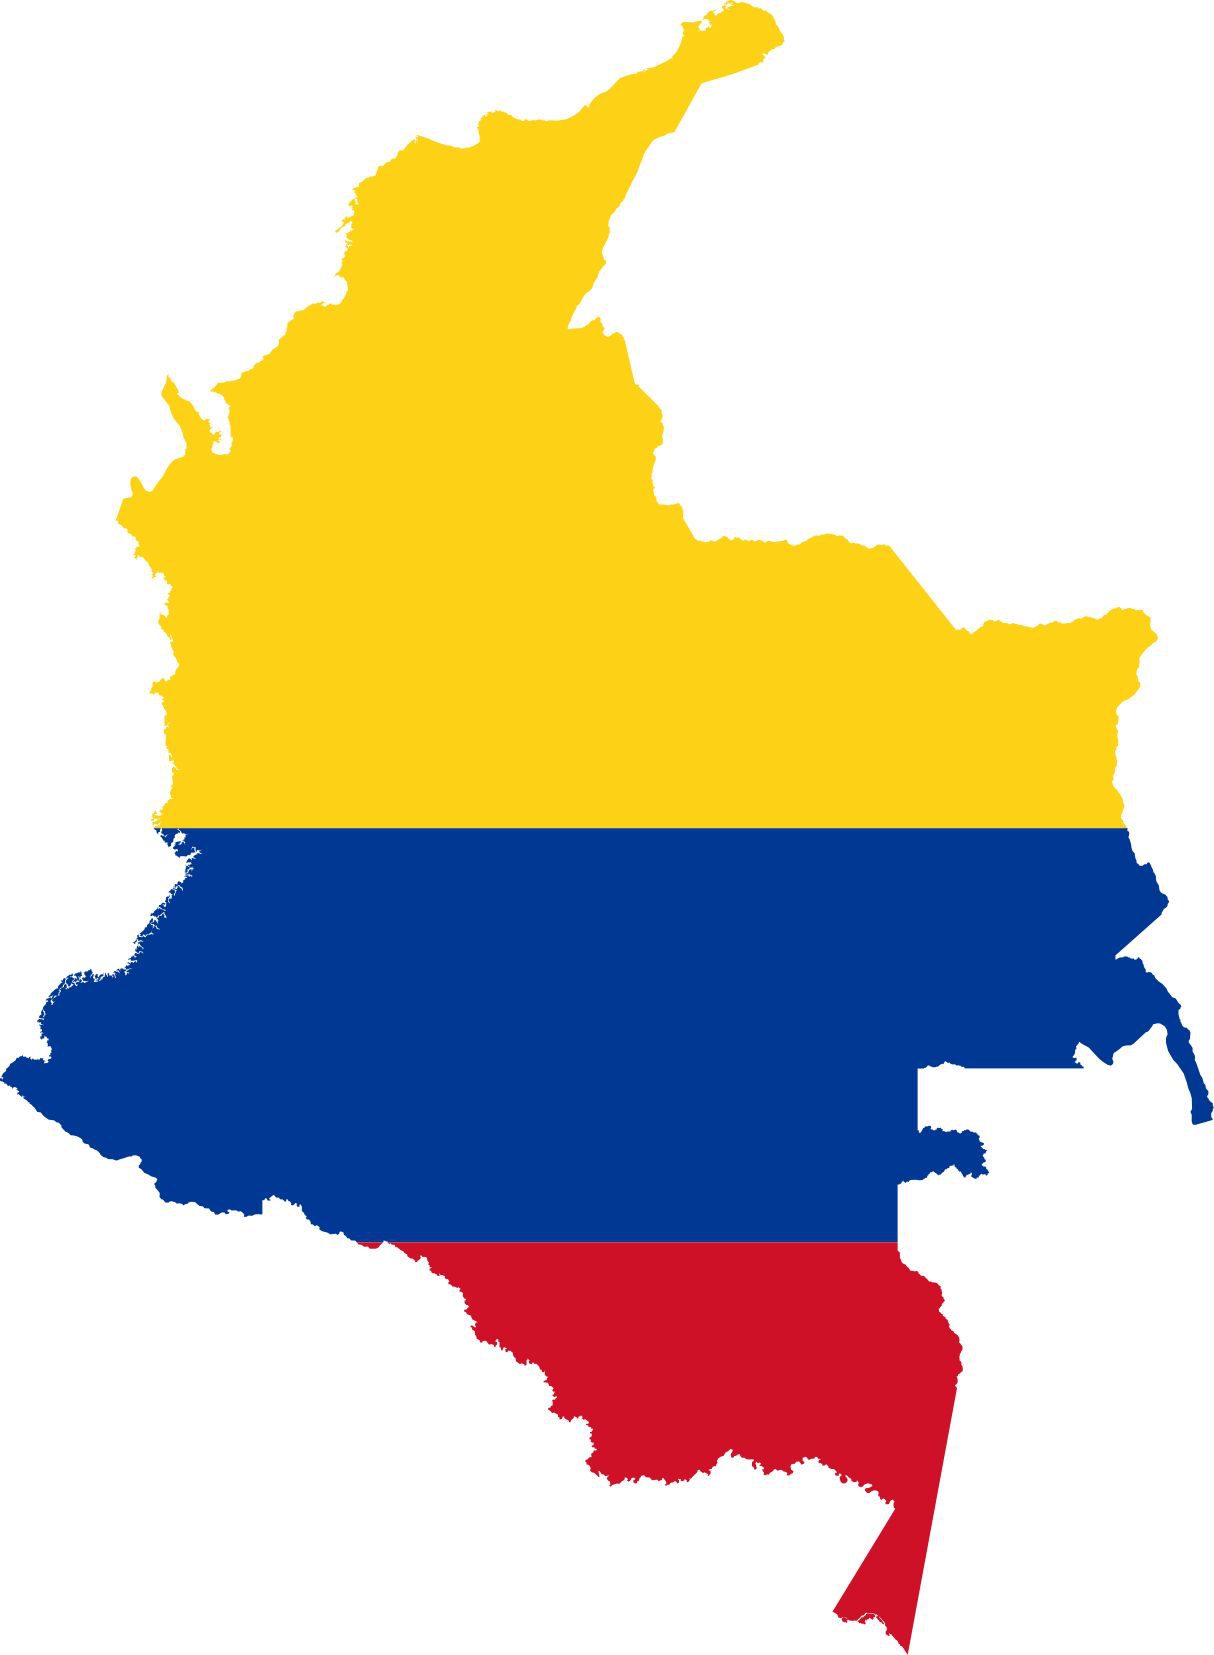

In [164]:
import PIL.Image
from IPython.display import display
img = PIL.Image.open("Mapa13.jpg")
display(img)

In [165]:
import numpy as np
mask = np.array(img)
mask

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



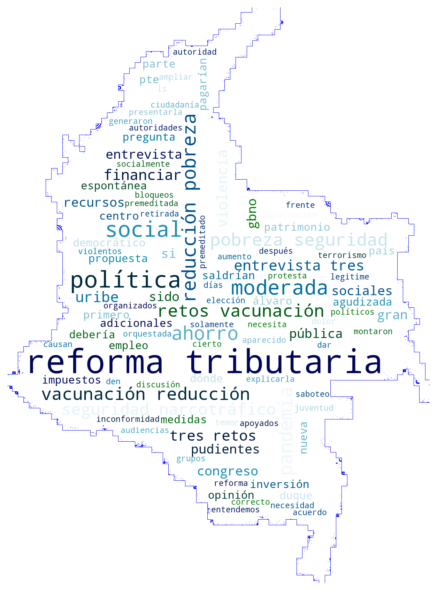

In [167]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = tweets_df.pre_procesado.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=800,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="ocean_r",
                      stopwords=stopwords_sp, 
                      collocations=True,
                      mask=mask, contour_width=1, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


#wordcloud.to_file("Mapa3.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()